# Customer sagementation -- Clustering analysis

## The purpose: 
1.what kind of customers do we have? 

2.Is it helpful for prediction? 

3.Is it helpful for targeted marketing?

## Steps:
1. data preparetion: encoding, scaling 


2. PCA: PCA & KernelPCA('rbf'/'poly'/'cosine')


3. number of components: 3, screet plot -- cummulated explained variance 

    
4. Visualise components on each feature (may get idea of number of clusters)


5. Number of clusters:4, silhouette score:0.481. elbow ('sum of squared distance (distortion)'/'silhouette')


6. Plot clusters: Plotly go


7. Type of customers/clusters:
    
   A. high value customers: high monthly charge/ many services/ long tenure
    
   B. stable but low value customers: low monthly charge, no internet service, long tenure
  
   C. high monthly charge customers: monthly contract, fibre
    
   D. low monthly charge DSL customers. 

**Importing and Reading**

The cleaned data is from telcom customer churn prediction

In [8]:
X = pd.read_csv('churnfeatures.csv')
data = X.copy(deep=True)

In [14]:
data.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [24]:
features=['Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Paperless_Billing', 'Monthly_Charges', 'Total_Charges',
       'Internet_Service_DSL', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year','Payment_Method_Electronic check']

In [28]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
datas=scale.fit_transform(data)
data_df=pd.DataFrame(datas)
data_df.columns = data.columns


# PCA 

In [16]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca=PCA(n_components=2)
pc=pca.fit_transform(datas)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,-1.899187,-0.341280
1,-1.688269,-2.459160
2,0.997350,-2.891534
3,2.369307,-1.898378
4,2.788046,-1.114026


In [36]:
def plot_pca(features,pca_value,scadata):
    fig, axes = plt.subplots(4, 5, figsize=(16, 8))

    for feature, ax in zip(features, axes.ravel()):
        cols = 'viridis'
        sizes = 20+20*scadata[feature]
        ax.scatter(pca_value[:, 0], pca_value[:, 1], s=sizes, alpha=0.3, c=scadata[feature], cmap=cols)
        ax.set_title(feature)
    plt.tight_layout()
    
# plot_pca(features,res_kpca_rbf,data_df)

### Screet plot

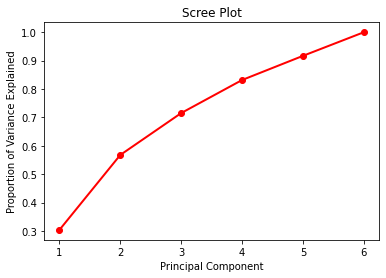

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

    
explained_variance_ratio=[]
for i in range(2,7):
    kpca = KernelPCA(n_components=i, kernel='rbf', gamma=0.05)
    res_kpca_rbf = kpca.fit_transform(datas)

    explained_variance = np.var(res_kpca_rbf, axis=0)
    explained_variance_ratio=explained_variance / np.sum(explained_variance)
    cum_ratio = np.cumsum(explained_variance_ratio)
    
PC_values = np.arange(1,7)

# fig,ax = plt.subplots(1,2, figsize=(12,5))

# ax1.plot(PC_values,)

# ax1.set_title('Scree Plot')
# ax1.set_xlabel('Principal Component')
# ax1.set_ylabel('Eigenvalue')
# ax1.axhline(y=1, linewidth=1, color='r', alpha=0.5)



plt.plot(PC_values, cum_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [19]:
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.05)
res_kpca_rbf = kpca.fit_transform(datas)

In [39]:
res_kpca_rbf[0]

array([0.11861799, 0.13210206, 0.3785226 ])

In [21]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [40]:
data['x_kpca_rbf'] = res_kpca_rbf[:, 0]
data['y_kpca_rbf'] = res_kpca_rbf[:, 1]
data['z_kpca_rbf'] = res_kpca_rbf[:, 2] 
# data['a_kpca_rbf'] = res_kpca_rbf[:, 3]
# data['b_kpca_rbf'] = res_kpca_rbf[:, 4]

# data['x_kpca_poly'] = res_kpca_poly[:4 0]
# data['y_kpca_poly'] = res_kpca_poly[:, 1]



In [190]:
data.to_csv('data_with_latent.csv',index=False)

# K-means

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [43]:
df = data.copy(deep=True)

In [44]:
res_kpca = df[['x_kpca_rbf', 'y_kpca_rbf','z_kpca_rbf']].to_numpy()
# res_kpca = df[['x_kpca_rbf', 'y_kpca_rbf']].to_numpy()


In [45]:
clusterer = KMeans(n_clusters=4)
clusters = clusterer.fit_predict(res_kpca)
markers = list('*hH+xXDd|.,ov^<>12348spP')

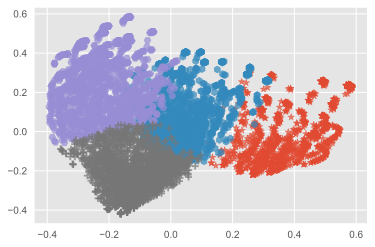

In [46]:

for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.7, marker=markers[cluster])

## Number of clusters

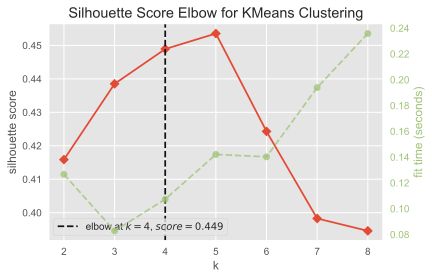

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 9), metric='silhouette') #silhouette

visualizer.fit(res_kpca)        
visualizer.show()

In [49]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

## Visualise clusters

In [50]:
df.groupby(['cluster_kpca_rbf'])['Tenure_Months','Monthly_Charges','Total_Charges',
                                 'Partner','Dependents',
                                'Internet_Service_DSL', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'].mean()

<ipython-input-50-b18fedb484d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cluster_kpca_rbf'])['Tenure_Months','Monthly_Charges','Total_Charges',


,Tenure_Months,Monthly_Charges,Total_Charges,Partner,Dependents,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year
cluster_kpca_rbf,,,,,,,,,,,
0,30.804636,21.080166,668.226821,0.488742,0.372848,0.000000,0.000000,1.000000,0.336424,0.241060,0.422517
1,13.849928,51.297294,715.354185,0.271284,0.178211,0.888167,0.100289,0.011544,0.908369,0.082251,0.009380
2,17.283883,85.635928,1529.696520,0.347375,0.067766,0.001832,0.998168,0.000000,0.996337,0.003663,0.000000
3,53.394978,84.860841,4603.436588,0.685134,0.281387,0.473097,0.526903,0.000000,0.189717,0.394181,0.416102


In [51]:
clusters = df.cluster_kpca_rbf
df_normalized = df.copy(deep=True)
# df_normalized.loc[:, features] = data
df_normalized[features] /= df[features].max()

In [52]:
import plotly.graph_objects as go

In [53]:
df_normalized.max()

Gender                                      1.000000
Senior_Citizen                              1.000000
Partner                                     1.000000
Dependents                                  1.000000
Tenure_Months                               1.000000
Phone_Service                               1.000000
Multiple_Lines                              1.000000
Online_Security                             1.000000
Online_Backup                               1.000000
Device_Protection                           1.000000
Tech_Support                                1.000000
Streaming_TV                                1.000000
Streaming_Movies                            1.000000
Paperless_Billing                           1.000000
Monthly_Charges                             1.000000
Total_Charges                               1.000000
Internet_Service_DSL                        1.000000
Internet_Service_Fiber optic                1.000000
Internet_Service_No                         1.

In [54]:
biggest_cluster = df.groupby(['cluster_kpca_rbf']).count().max().max()

In [ ]:
fig = go.Figure()

for cluster in np.unique(clusters):
    
    radii = df_normalized.loc[df_normalized.cluster_kpca_rbf==cluster, features].mean().tolist()
    thetas = features
    
    actual_values = df.loc[df.cluster_kpca_rbf==cluster, features].mean().tolist()
    cluster_size = len(df[df.cluster_kpca_rbf==cluster])
    print(cluster_size)
    fig.add_trace(
        go.Scatterpolar(
            r=radii + radii[:1],
            theta=thetas + thetas[:1],
            mode='lines',
            name=f'Cluster {cluster}',
            text = [f'Mean value: {x}' for x in actual_values + actual_values[:1]],
            line=dict(width=3),
            opacity=np.max([cluster_size/biggest_cluster, 0.6])
        )
    )

fig.update_layout(
    title='Cluster Analysis',
    showlegend=True,
    template='plotly_dark',
    width=800,
    autosize=False
)

fig.show()